# Amazon expense analysis
by Vinodhini Rajamanickam

This project and the data contained within are the property of [*Vinodhini Rajamanickam*] and were provided by Amazon as per my request.
This project is for educational and study purposes only. Any misuse, reproduction, or distribution of this project or data is strictly prohibited and will not be tolerated.

Please note that the data provided is unique to this project and is not to be used or replicated without permission from [Vinodhini Rajamanickam].


### importing necessary packages

In [1]:
#data analysis
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### read data

In [2]:
data = pd.read_csv("Retail.OrderHistory.2.csv")

In [ ]:
data.head(3)

In [3]:
# the number of rows and columns
data.shape

(303, 27)

In [4]:
#columns in the data
data.columns

Index(['Website', 'Order ID', 'Order Date', 'Purchase Order Number',
       'Currency', 'Unit Price', 'Unit Price Tax', 'Shipping Charge',
       'Total Discounts', 'Total Owed', 'Shipment Item Subtotal',
       'Shipment Item Subtotal Tax', 'ASIN', 'Product Condition', 'Quantity',
       'Payment Instrument Type', 'Order Status', 'Shipment Status',
       'Ship Date', 'Shipping Option', 'Shipping Address', 'Billing Address',
       'Carrier Name & Tracking Number', 'Product Name', 'Gift Message',
       'Gift Sender Name', 'Gift Recipient Contact Details'],
      dtype='object')

#### remove unnecessary columns

In [5]:
data = data.drop(["Payment Instrument Type",'Order ID',"Purchase Order Number","Gift Message","Gift Sender Name","Gift Recipient Contact Details","Currency","Website","Billing Address","Shipping Address","Carrier Name & Tracking Number","ASIN","Product Condition","Shipment Item Subtotal","Shipment Item Subtotal Tax"],axis = 1)

In [ ]:
data.head(3)

#### splitting order Date into separate columns: order date, order time, order month and order year

In [6]:
#convert order date column into datetime
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [ ]:
data.head(2)

In [7]:
# split the order date column into separate date and time columns

data['Order date'] = data['Order Date'].dt.date
data['Order Time'] = data['Order Date'].dt.time

#splitting the order date column into seaprate month and year column
data['Order Month'] = data['Order Date'].dt.to_period('M')
data['Order Year'] = data['Order Date'].dt.to_period('Y')


#deleting the original order date column
data.drop('Order Date', axis=1, inplace=True)

C:\Users\avino\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\avino\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [ ]:
data.head(2)

In [8]:
#checking shape after deleting  and adding columns
data.shape

(303, 15)

In [9]:
#checking for null values
data.isnull().sum()

Unit Price           0
Unit Price Tax       0
Shipping Charge      0
Total Discounts      0
Total Owed           0
Quantity             0
Order Status         0
Shipment Status     77
Ship Date           77
Shipping Option    114
Product Name         0
Order date           0
Order Time           0
Order Month          0
Order Year           0
dtype: int64

In [11]:
# filling null values
data = data.fillna("not available")
# data

In [12]:
#checking for null values after filling all the null values
data.isnull().sum()

Unit Price         0
Unit Price Tax     0
Shipping Charge    0
Total Discounts    0
Total Owed         0
Quantity           0
Order Status       0
Shipment Status    0
Ship Date          0
Shipping Option    0
Product Name       0
Order date         0
Order Time         0
Order Month        0
Order Year         0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   Unit Price       303 non-null    object       
 1   Unit Price Tax   303 non-null    object       
 2   Shipping Charge  303 non-null    float64      
 3   Total Discounts  303 non-null    object       
 4   Total Owed       303 non-null    object       
 5   Quantity         303 non-null    int64        
 6   Order Status     303 non-null    object       
 7   Shipment Status  303 non-null    object       
 8   Ship Date        303 non-null    object       
 9   Shipping Option  303 non-null    object       
 10  Product Name     303 non-null    object       
 11  Order date       303 non-null    object       
 12  Order Time       303 non-null    object       
 13  Order Month      303 non-null    period[M]    
 14  Order Year       303 non-null    period[A-DEC]
dtypes: flo

In [14]:
data.describe()

,Shipping Charge,Quantity
count,303.000000,303.000000
mean,3.082211,0.768977
std,28.391927,0.466878
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,345.000000,3.000000


## total amount of money spent

In [15]:
data["Total Owed"] = data["Total Owed"].str.replace("," ,"").astype(float)


In [16]:
total_spent = data.query("`Order Status` != 'Cancelled'")["Total Owed"]
total_spent = total_spent.to_frame()
total_spent

,Total Owed
0,1499.0
2,175.0
3,1499.0
4,1474.0
5,199.0
...,...
294,10.0
297,399.0
298,374.0
300,588.0


In [17]:
# total amount of money spend on amazon
total_spent["Total Owed"].sum()

346620.33999999997

the total amount of money I spent on amazon shopping is ₹346620.33 

### average amount of money spent 

In [18]:
total_spent["Total Owed"].mean()

1520.264649122807

the average amount of money I spent on amazon shopping is ₹ 1520.26

### highest priced order

In [19]:
total_spent["Total Owed"].max()

74990.0

In [20]:
#where I spent the maximum amount of money
data.query("`Total Owed`== 74990.0 and  `Order Status` != 'Cancelled'")

,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Quantity,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name,Order date,Order Time,Order Month,Order Year
123,"63,550.85","11,439.15",0.0,0,74990.0,1,Closed,Shipped,04/15/2022 20:31:31 UTC,same-in-cod-eligible,ASUS TUF Gaming A15 (2021) 15.6-inch (39.62 cm...,2022-04-15,17:17:36,2022-04,2022


the highest amount I paid is : ₹ 74990 

and the product I bought is : ASUS TUF Gaming A15 (2021) 15.6-inch

### lowest priced order

In [21]:
# total_spent["Total Owed"].min()
min_value = total_spent.loc[total_spent["Total Owed"] > 49, "Total Owed"].min() 
min_value

54.0

In [22]:
#where I spend the mnimum amount of money
data.query("`Total Owed`== 54.0 and  `Order Status` != 'Cancelled'")

,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,Total Owed,Quantity,Order Status,Shipment Status,Ship Date,Shipping Option,Product Name,Order date,Order Time,Order Month,Order Year
64,51.43,2.57,0.0,0,54.0,1,Closed,Shipped,08/11/2022 22:17:29 UTC,next-in-pantry,"Amazon Brand - Vedaka Sugar, Premium, 1kg",2022-08-11,17:17:09,2022-08,2022


the lowest amount I paid is : ₹ 54.00

and the product I bought is : Amazon Brand - Vedaka Sugar, Premium, 1kg

## amount of sales tax paid

In [23]:
# checking the data type of the column
data["Unit Price Tax"].dtype

dtype('O')

In [24]:
#converting the column into intger data type
data["Unit Price Tax"]= data["Unit Price Tax"].str.replace(",","").astype(float)

In [25]:
#converting it into a data frame
tax_spend = data.query("`Order Status` != 'Cancelled'")["Unit Price Tax"]
tax_spend = tax_spend.to_frame()
tax_spend

,Unit Price Tax
0,228.66
2,0.00
3,228.66
4,228.66
5,0.00
...,...
294,0.00
297,0.00
298,0.00
300,28.00


In [26]:
#total tax paid
tax_spend["Unit Price Tax"].sum()

39246.25

the total amount of tax I paid is : ₹ 39246.25

### overall tax paid in percentage

In [27]:
overall_tax = tax_spend["Unit Price Tax"].sum()/total_spent["Total Owed"].sum()
overall_tax_per = overall_tax*100
overall_tax_per

11.322546738024664

the overall tax I paid for on amazon  is : 11.32 % 

### Calculate shipping expenses

In [28]:
shipping_spend = data.query("`Order Status` != 'Cancelled'")["Shipping Charge"]
shipping_spend = shipping_spend.to_frame()
shipping_spend

,Shipping Charge
0,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
294,0.0
297,0.0
298,0.0
300,1.9


In [29]:
shipping_spend["Shipping Charge"].sum()

885.1

total shipping charges I have paid is : ₹ 885.1

### total discounts 

In [30]:
discount = data.query("`Order Status` != 'Cancelled'")["Total Discounts"]
discount = discount.to_frame()
discount

,Total Discounts
0,0
2,0
3,0
4,'-25'
5,0
...,...
294,0
297,0
298,0
300,0


In [31]:
discount["Total Discounts"] = discount["Total Discounts"].str.replace("['\,]","", regex=True).astype(float)

In [32]:
discount.sum()

Total Discounts   -2060.45
dtype: float64

total discounts I have got is : ₹ 2060.45

### money spent over a period of time

In [33]:
#taking out the cancelled row from the data 
order_data = data[data["Order Status"]!= "Cancelled"]

In [ ]:
order_data.head(2)

In [34]:
# Calculate expenses over time
expenses_over_time = order_data.groupby(['Order date'])['Total Owed'].sum()
expenses_over_time

Order date
2017-07-09     574.0
2019-04-15     588.0
2019-10-08     773.0
2019-10-31      58.0
2019-11-01       0.0
               ...  
2023-02-13     199.0
2023-02-17    1474.0
2023-02-18    1499.0
2023-02-19     175.0
2023-02-27    1499.0
Name: Total Owed, Length: 160, dtype: float64

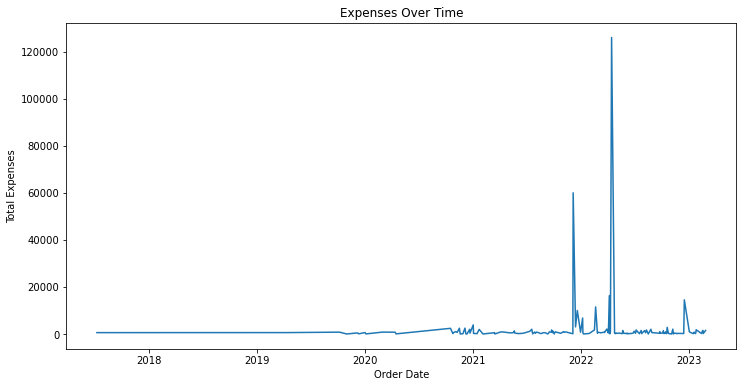

In [35]:
# Visualize expenses over time
plt.figure(figsize=(12,6))
sns.lineplot(x=expenses_over_time.index, y=expenses_over_time.values)
plt.title('Expenses Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Expenses')
plt.show()

### Calculate expenses by month

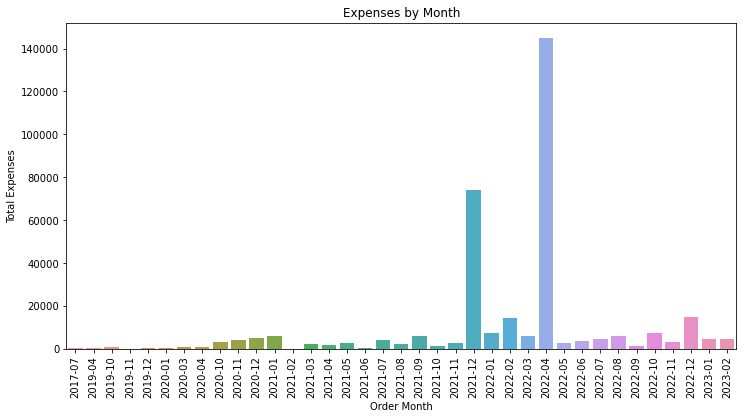

In [40]:
expenses_by_month = order_data.groupby(['Order Month'])['Total Owed'].sum()

# Visualize expenses by month
plt.figure(figsize=(12,6))
sns.barplot(x=expenses_by_month.index.astype(str), y=expenses_by_month.values)
plt.title('Expenses by Month')
plt.xlabel('Order Month')
plt.ylabel('Total Expenses')
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()


### calculate expenses by year

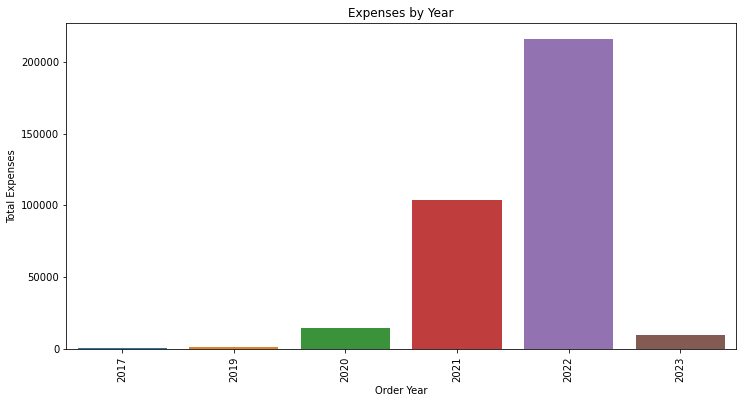

In [42]:
expenses_by_year = order_data.groupby(['Order Year'])['Total Owed'].sum()

# Visualize expenses by year
plt.figure(figsize=(12,6))
sns.barplot(x=expenses_by_year.index.astype(str), y=expenses_by_year.values)
plt.title('Expenses by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Expenses')
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

### total money paid with the tax and the shipping charges

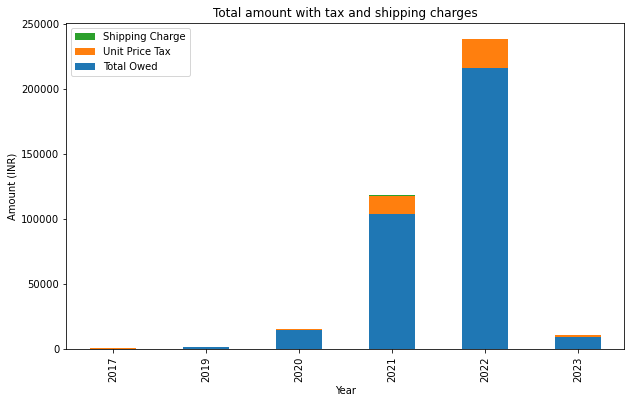

In [43]:
# group the data by the columns of interest and sum the values
stacked_data = order_data.groupby(['Order Year'])[['Total Owed','Unit Price', 'Unit Price Tax', 'Shipping Charge', 'Total Discounts']].sum()

# create a stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Amount (INR)')
ax.set_title('Total amount with tax and shipping charges')

# add a legend to the chart
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))

plt.show()


### tax paid over a period of time

Order date
2017-07-09     82.98
2019-04-15     28.00
2019-10-08      0.00
2019-10-31      0.00
2019-11-01      0.00
               ...  
2023-02-13      0.00
2023-02-17    228.66
2023-02-18    228.66
2023-02-19      0.00
2023-02-27    228.66
Name: Unit Price Tax, Length: 160, dtype: float64


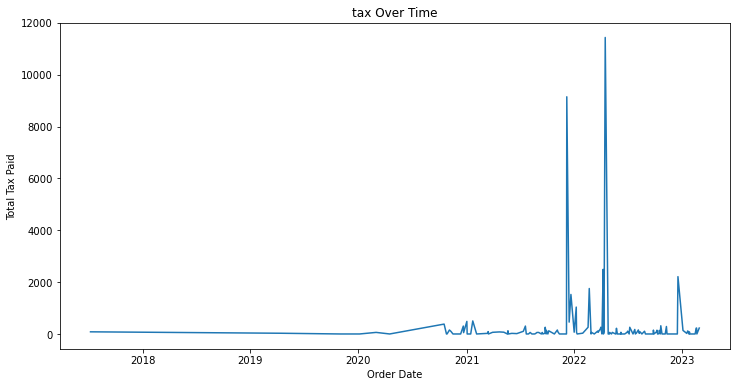

In [45]:
# Calculate tax paid over time
tax_over_time = order_data.groupby(['Order date'])['Unit Price Tax'].sum()
print(tax_over_time)

# Visualize tax paid over time
plt.figure(figsize=(12,6))
sns.lineplot(x=tax_over_time.index, y=tax_over_time.values)
plt.title('tax Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Tax Paid')
plt.show()

### tax paid by year

Order Year
2017       82.98
2019       28.00
2020     1052.39
2021    14249.75
2022    22718.50
2023     1114.63
Freq: A-DEC, Name: Unit Price Tax, dtype: float64


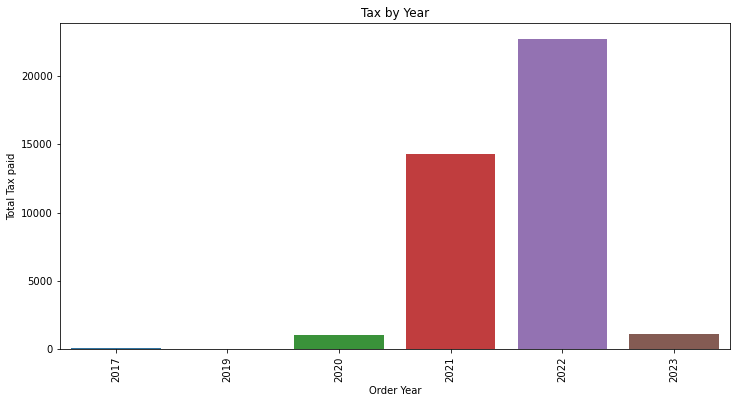

In [47]:
tax_by_year = order_data.groupby(['Order Year'])['Unit Price Tax'].sum()
print(tax_by_year)

# Visualize tax paid by year
plt.figure(figsize=(12,6))
sns.barplot(x=tax_by_year.index.astype(str), y=tax_by_year.values)
plt.title('Tax by Year')
plt.xlabel('Order Year')
plt.ylabel('Total Tax paid')
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees
plt.show()

### Insights

1) the total amount of money I spent on amazon shopping is ₹346620.33

2) the average amount of money I spent on amazon shopping is ₹ 1520.26

3) the highest amount of money I spent is : ₹ 74990

and highest amount of tax paid is : ₹ 11,439.15

4) the lowest amount of money I spent is : ₹ 54.00

5) the total amount of tax I paid is : ₹ 39246.25

6) the overall tax I paid on amazon is : 11.32 %

7) total shipping charges I have paid is : ₹ 885.1

8) total discounts I have got is : ₹ 2060.45
 